In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [82]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import seaborn as sns
import json

In [83]:
en_df = pd.read_json('dataset_en_train.json', lines=True, orient='columns').sample(1000)
es_df = pd.read_json('dataset_es_train.json', lines=True, orient='columns').sample(1000)
fr_df = pd.read_json('dataset_fr_train.json', lines=True, orient='columns').sample(1000)
de_df = pd.read_json('dataset_de_train.json', lines=True, orient='columns').sample(1000)
ja_df = pd.read_json('dataset_ja_train.json', lines=True, orient='columns').sample(1000)
zh_df = pd.read_json('dataset_zh_train.json', lines=True, orient='columns').sample(1000)
lang_frames = [en_df, es_df, fr_df, de_df, ja_df, zh_df]
all_reviews_df = pd.concat(lang_frames)
print('English Reviews: ', len(en_df))
print('Spanish Reviews: ', len(es_df))
print('French Reviews: ', len(fr_df))
print('German Reviews:  ', len(de_df))
print('Japanese Reviews: ', len(ja_df))
print('Chinese Reviews',len(zh_df))
print('Total Reviews: ',len(all_reviews_df))

English Reviews:  1000
Spanish Reviews:  1000
French Reviews:  1000
German Reviews:   1000
Japanese Reviews:  1000
Chinese Reviews 1000
Total Reviews:  6000


In [84]:
#remove special characters from text column
all_reviews_df['review_title'] = all_reviews_df['review_title'].str.replace('\W', ' ', regex=True)
# remove numbers and digits form text
all_reviews_df['review_title'] = all_reviews_df['review_title'].str.replace('\d', ' ', regex=True)
# convert text to lower case
all_reviews_df['review_title'] = all_reviews_df['review_title'].str.lower()
# remove n spaces and convert to a single space
all_reviews_df['review_title'] = all_reviews_df['review_title'].str.replace('\s{2,}', ' ', regex=True)
# remove leading and trailing spaces
all_reviews_df['review_title'].str.strip()


127089                    cable set
114738                  three stars
108290                  great value
43419     not what it appears to be
3232                  cheap no good
                    ...            
1479                     以次充好 欺骗消费者
103017                书是好书 被翻译和装订坑了
179368                         差三册啊
160060                          入手的
69621                          太不值了
Name: review_title, Length: 6000, dtype: object

In [85]:
all_reviews_df = all_reviews_df[["review_body", "review_title", "language"]]
print(all_reviews_df.head(2))
print(all_reviews_df.shape)

                                              review_body review_title  \
127089  The overall length of the cable, which is what...    cable set   
114738    After about 1 year the lid doesn't stay closed.  three stars   

       language  
127089       en  
114738       en  
(6000, 3)


In [86]:
le = preprocessing.LabelEncoder();
all_reviews_df['language'] = le.fit_transform(all_reviews_df['language'])
all_reviews_df.head()

,review_body,review_title,language
127089,"The overall length of the cable, which is what...",cable set,1
114738,After about 1 year the lid doesn't stay closed.,three stars,1
108290,dog seems to enjoy it,great value,1
43419,This product is gravely misrepresented by Camp...,not what it appears to be,1
3232,Very cheap quality I returned it got a refund,cheap no good,1


In [87]:
X = all_reviews_df['review_title']
Y = all_reviews_df['language']

from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
X = CV.fit_transform(X).toarray()

print(X.shape)

(6000, 6779)


In [88]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate #import cross_val_score from sklearn.model_selection

model1 = MultinomialNB()
model1.fit(X, Y)

MultinomialNB()

In [89]:
model2 = QuadraticDiscriminantAnalysis()
model2.fit(X, Y)

/Users/raviraghavan/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [90]:
k_values = list(range(1, 21)) 
cross_validation_scores_model = [cross_validate(KNeighborsClassifier(n_neighbors = k), X, Y) for k in k_values] #compute cross validation scores for each alpha for Ridge Regression
mean_validation_scores_model = [data["test_score"].mean() for data in cross_validation_scores_model] #compute mean of cross validation scores
std_validation_scores_model = [data["test_score"].std() for data in cross_validation_scores_model] #compute standard deviation of cross validation scores
best_k = k_values[np.argmax(mean_validation_scores_model)] #determine which alphs gives us best cross validation score

model3 = KNeighborsClassifier(n_neighbors = best_k)
model3.fit(X, Y)


KNeighborsClassifier(n_neighbors=4)

In [91]:
en_df_test = pd.read_json('dataset_en_test.json', lines=True, orient='columns')
es_df_test = pd.read_json('dataset_es_test.json', lines=True, orient='columns')
fr_df_test = pd.read_json('dataset_fr_test.json', lines=True, orient='columns')
de_df_test = pd.read_json('dataset_de_test.json', lines=True, orient='columns')
ja_df_test = pd.read_json('dataset_ja_test.json', lines=True, orient='columns')
zh_df_test = pd.read_json('dataset_zh_test.json', lines=True, orient='columns')
lang_frames_test = [en_df_test, es_df_test, fr_df_test, de_df_test, ja_df_test, zh_df_test]
all_reviews_df_test = pd.concat(lang_frames_test)
print('English Reviews: ', len(en_df_test))
print('Spanish Reviews: ', len(es_df_test))
print('French Reviews: ', len(fr_df_test))
print('German Reviews:  ', len(de_df_test))
print('Japanese Reviews: ', len(ja_df_test))
print('Chinese Reviews',len(zh_df_test))
print('Total Reviews: ',len(all_reviews_df_test))

English Reviews:  5000
Spanish Reviews:  5000
French Reviews:  5000
German Reviews:   5000
Japanese Reviews:  5000
Chinese Reviews 5000
Total Reviews:  30000


In [92]:
from sklearn.metrics import confusion_matrix

#remove special characters from text column
all_reviews_df_test['review_title'] = all_reviews_df_test['review_title'].str.replace('\W', ' ', regex=True)
# remove numbers and digits form text
all_reviews_df_test['review_title'] = all_reviews_df_test['review_title'].str.replace('\d', ' ', regex=True)
# convert text to lower case
all_reviews_df_test['review_title'] = all_reviews_df_test['review_title'].str.lower()
# remove n spaces and convert to a single space
all_reviews_df_test['review_title'] = all_reviews_df_test['review_title'].str.replace('\s{2,}', ' ', regex=True)
# remove leading and trailing spaces
all_reviews_df_test['review_title'].str.strip()

all_reviews_df_test = all_reviews_df_test[["review_body", "review_title", "language"]]

all_reviews_df_test['language'] = le.transform(all_reviews_df_test['language'])


X = all_reviews_df_test['review_title']
Y = all_reviews_df_test['language']
X = CV.transform(X).toarray()

Y_pred1 = model1.predict(X)
conf_mat1 = confusion_matrix(Y, Y_pred1, labels = model1.classes_)


Y_pred2 = model2.predict(X)
conf_mat2 = confusion_matrix(Y, Y_pred2, labels = model2.classes_)


Y_pred3 = model3.predict(X)
conf_mat3 = confusion_matrix(Y, Y_pred3, labels = model3.classes_)

print(conf_mat1)
print(conf_mat2)
print(conf_mat3)

from sklearn.metrics import plot_confusion_matrix



[[4894   67   14   21    1    3]
 [ 224 4726   24   25    1    0]
 [ 603   28 4234  132    2    1]
 [ 570   47   57 4318    4    4]
 [4446   11    5    7  530    1]
 [3829   12    4    2    5 1148]]
[[ 694  158  277 3870    1    0]
 [ 517 1202  618 2663    0    0]
 [ 460  374 1817 2346    3    0]
 [ 219  856  501 3421    2    1]
 [   1    2    7 4990    0    0]
 [   1    3    4 4992    0    0]]
[[2783   50  184  160  152 1671]
 [ 467 2957   70   55   91 1360]
 [ 290  138 2789  180  156 1447]
 [ 347   39  277 2798  104 1435]
 [  49   10   17    0  235 4689]
 [  31    7   20    0    0 4942]]


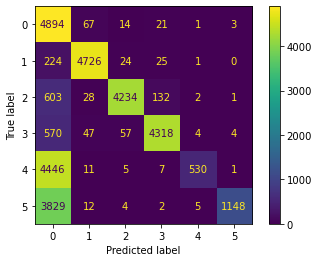

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1, display_labels= ['0', '1', '2', '3', '4', '5'])
disp1.plot()
plt.show()


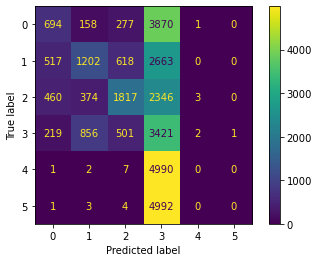

In [94]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_mat2, display_labels= ['0', '1', '2', '3', '4', '5'])
disp2.plot()
plt.show()



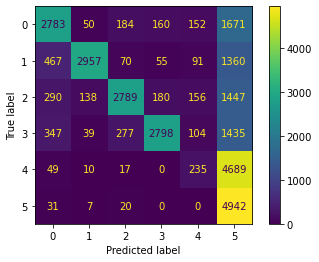

In [95]:
disp3 = ConfusionMatrixDisplay(confusion_matrix=conf_mat3, display_labels= ['0', '1', '2', '3', '4', '5'])
disp3.plot()
plt.show()
